<a href="https://colab.research.google.com/github/AnaAleixo/AnaAleixo/blob/main/%C3%8Dndice_InOrdinatio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1º Passo
 Explorarando o **ArquivoA** para verificar se ele contém as informações necessárias para aplicar o método **InOrdinatio.Title, PublishYear, Source title, Cited by, e CiteScore.**

In [4]:
# Importa a biblioteca pandas
import pandas as pd

# Carrega o arquivo CSV da base de dados local
# Substitua 'caminho_para_seu_arquivo.csv' pelo caminho correto do arquivo no seu Google Colab
df = pd.read_csv('/content/artigos.csv')

# Mostra os títulos das colunas do DataFrame
print("Colunas disponíveis no DataFrame:")
print(df.columns.tolist())

# Exibe as primeiras linhas do DataFrame para ter uma visão geral dos dados
print("\nPrimeiras linhas do DataFrame:")
print(df.head())


Colunas disponíveis no DataFrame:
['Authors', 'Author full names', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by', 'DOI', 'Link', 'Affiliations', 'Authors with affiliations', 'Abstract', 'Author Keywords', 'Index Keywords', 'Molecular Sequence Numbers', 'Chemicals/CAS', 'Tradenames', 'Manufacturers', 'Funding Details', 'Funding Texts', 'References', 'Correspondence Address', 'Editors', 'Publisher', 'Sponsors', 'Conference name', 'Conference date', 'Conference location', 'Conference code', 'ISSN', 'ISBN', 'CODEN', 'PubMed ID', 'Language of Original Document', 'Abbreviated Source Title', 'Document Type', 'Publication Stage', 'Open Access', 'Source', 'EID']

Primeiras linhas do DataFrame:
                                             Authors  \
0  Chang-Espino M.C.; González-Fernández I.; Prie...   
1                           Singh P.; Kalamdhad A.S.   
2                         Choo G.-H.; Lee K.; Kim G. 

## Considerações Importates das informações obtidas no passo 1º.
Verifica-se as seguintes informações na resposta dessa etapa. A baseA tem dois dais importantes para o calculo Ordinatio (**Year; Cited by**). Iremos limpar a base, mas ieri manter também as informações Title, Source title. O Title é importante para as fases das etapas 8 e 9 do método Orninatio e o Source title será importante para concatenar os títulos da base de dados B (https://www.scopus.com/sources.uri).

# 2º Passo
Nesta etapa Vamos criar um código para selecionar apenas as colunas Title, Year, Source title, Abstract, e Cited by do arquivo CSV. E iremos carregar o arquivo original, selecionar as colunas especificadas acims, e salvar um novo arquivo CSV chamado artigos_limpos.csv sem os índices de linha.

In [3]:
import pandas as pd

# Carrega o arquivo CSV
df = pd.read_csv('/content/artigos.csv')

# Seleciona apenas as colunas desejadas
df_clean = df[['Title', 'Abstract','Source title', 'Year', 'Cited by']]

# Mostra as primeiras linhas do novo DataFrame limpo para verificar
print(df_clean.head())

# Opcional: Salvar o DataFrame limpo em um novo arquivo CSV
df_clean.to_csv('artigos_limpo.csv', index=False)


                                               Title  \
0  Nitrogen modulates the ozone response of Medit...   
1  Unravelling barriers associated with dissemina...   
2  Estimation of nighttime PM2.5 concentrations o...   
3  Estimating energy left in discarded alkaline b...   
4  Inter-annual variability and health risk asses...   

                                            Abstract  \
0  The experiment was conducted in an Open Top Ch...   
1  This study explores why large-scale biogas pla...   
2  With rapid economic development and urban grow...   
3  Each year, a significant number of single-use ...   
4  This study investigated the inter-annual varia...   

                       Source title  Year  Cited by  
0  Science of the Total Environment  2024         0  
1            Bioresource Technology  2024         0  
2           Atmospheric Environment  2024         0  
3                  Waste Management  2024         0  
4           Atmospheric Environment  2024         0  


# 3º Passo
Usando display do IPython, iremos exibir o DataFrame em um formato de tabela, facilitando a visualização das informações contidas nas primeiras linha da nova base de dados.

In [5]:
# Importa a função display para uma visualização melhor no notebook
from IPython.display import display

# Exibe o DataFrame limpo em formato de tabela
display(df_clean.head())


,Title,Abstract,Source title,Year,Cited by
0,Nitrogen modulates the ozone response of Medit...,The experiment was conducted in an Open Top Ch...,Science of the Total Environment,2024,0
1,Unravelling barriers associated with dissemina...,This study explores why large-scale biogas pla...,Bioresource Technology,2024,0
2,Estimation of nighttime PM2.5 concentrations o...,With rapid economic development and urban grow...,Atmospheric Environment,2024,0
3,Estimating energy left in discarded alkaline b...,"Each year, a significant number of single-use ...",Waste Management,2024,0
4,Inter-annual variability and health risk asses...,This study investigated the inter-annual varia...,Atmospheric Environment,2024,0


# 4º Passo
Carregar a base de dados B (noemada de fator), contatendo as informações das revistas (**Source title**) da base scopus e sues respectivos fatores de impactos (**CiteScore**). Em seguida explora seu contéudo para saber quais informações tal base contém.

In [9]:
# Carrega o arquivo CSV com os scores das revistas
df_scores = pd.read_csv('/content/fator.csv')

# Mostra os títulos das colunas do DataFrame com os scores
print("Colunas disponíveis no DataFrame de Scores:")
print(df_scores.columns.tolist())

# Exibe as primeiras linhas para ter uma visão geral dos dados
print("\nPrimeiras linhas do DataFrame de Scores:")
print(df_scores.head())


Colunas disponíveis no DataFrame de Scores:
['Source title', 'CiteScore']

Primeiras linhas do DataFrame de Scores:
                            Source title  CiteScore
0  Morbidity and Mortality Weekly Report       65.4
1            MMWR Surveillance Summaries       60.5
2   Nature Reviews Earth and Environment       52.9
3       Energy and Environmental Science       50.5
4                       Fungal Diversity       44.8


# Consideração
Verficamos que a base B traz duas informações necessarias para que possamos  proceder com a combinação dos dados, usando o título da revista (Source title) como chave para associar o score de cada revista aos dados do artigo_limpo.

# 5° Passo
Esta etapa iremos combinar os arquivos duas tabelas a coluna **Source title**, dos arquivos **A(artigos_limpos)** e **B (fator)** como a chave de ligação entre os dois arquivos. O objetivo é gerar um novo arquivo contendo as informações do fator de impacto (CiteScore) das revistas de forma automatica.

In [25]:
import pandas as pd

# Carregar os arquivos CSV
artigos = pd.read_csv('/content/artigos_limpo.csv')
fatores = pd.read_csv('/content/fator.csv')

# Padronizar os títulos (remover espaços extras e transformar em letras minúsculas)
artigos['Source title'] = artigos['Source title'].str.strip().str.lower()
fatores['Source title'] = fatores['Source title'].str.strip().str.lower()

# Identificar e exibir o número de títulos das revistas em comum
titulos_comuns = set(artigos['Source title']).intersection(set(fatores['Source title']))
print(f"Número de títulos em comum: {len(titulos_comuns)}")

# Filtrar os artigos e fatores apenas com títulos das revistas em comum
artigos_filtrados = artigos[artigos['Source title'].isin(titulos_comuns)].copy()
fatores_filtrados = fatores[fatores['Source title'].isin(titulos_comuns)].copy()

# Verificar duplicatas para evitar resultados incorretos
print(f"Duplicatas em 'artigos_filtrados': {artigos_filtrados.duplicated(subset='Source title').sum()}")
print(f"Duplicatas em 'fatores_filtrados': {fatores_filtrados.duplicated(subset='Source title').sum()}")

# Remover duplicatas (se necessário) para garantir merge correto
artigos_filtrados = artigos_filtrados.drop_duplicates(subset='Source title')
fatores_filtrados = fatores_filtrados.drop_duplicates(subset='Source title')

# Realizar o merge apenas com os títulos em comum
arquivo_Score = pd.merge(
    artigos_filtrados,
    fatores_filtrados,
    on='Source title',
    how='inner'
)

# Verificar o número de linhas após o merge
print(f"Linhas após o merge: {len(arquivo_Score)}")

# Salvar o resultado em Excel
# arquivo_Score.to_excel('/content/arquivo_Score.xlsx', index=False)

#print("Arquivo 'arquivo_Score.xlsx' gerado com sucesso.")


# ****************************************
# Gerar arquivo_Score CSV
# *****************************************

import pandas as pd

# Carrega o arquivo XLS
#df_xls = pd.read_excel('/content/arquivo_Score.xlsx')

# Salva o DataFrame como CSV
df_xls.to_csv('arquivo_Score.csv', index=False)
print("Arquivo 'arquivo_Score.csv' gerado com sucesso.")

Número de títulos em comum: 108
Duplicatas em 'artigos_filtrados': 13303
Duplicatas em 'fatores_filtrados': 0
Linhas após o merge: 108
Arquivo 'arquivo_Score.csv' gerado com sucesso.


# Consideração
Nesta epata, foi gerado uma nova planilha excel e csv, contendo as seguintes informações: **Title, PublishYear, Source title, Cited by, e CiteScore**, Necessarias para as próximas etapas.
## Abaixo segue visualização da planilha, contendo o fator de impacto das publicações, após combinação da chave.

In [28]:
import pandas as pd
from IPython.display import display

# Carregar o arquivo CSV
arquivo_score = pd.read_csv('/content/arquivo_Score.csv')

# Exibir as primeiras linhas usando display
print("Planilha contendo todos os dados para calculo do Inordinatio ")
display(arquivo_score.head())

# Verificar o número de linhas e colunas para garantir a integridade dos dados
print(f"Linhas: {arquivo_score.shape[0]}, Colunas: {arquivo_score.shape[1]}")


Planilha contendo todos os dados para calculo do Inordinatio 


,Title,Abstract,Source title,Year,Cited by,CiteScore
0,Nitrogen modulates the ozone response of Medit...,The experiment was conducted in an Open Top Ch...,science of the total environment,2024,0,17.6
1,Unravelling barriers associated with dissemina...,This study explores why large-scale biogas pla...,bioresource technology,2024,0,20.8
2,Estimation of nighttime PM2.5 concentrations o...,With rapid economic development and urban grow...,atmospheric environment,2024,0,9.4
3,Estimating energy left in discarded alkaline b...,"Each year, a significant number of single-use ...",waste management,2024,0,15.6
4,Of heroes and villains – How coalitions shape ...,Policy narrative analyses provide important in...,environmental science and policy,2024,0,10.9


Linhas: 108, Colunas: 6


# Geração do calculo do Índice InOrdinatio
Nesta etapa será aplicado de forma automática o Inordinatio, bem será gerada uma arquivo em excel e csv com a lista dos artigos e seus índeces de forma decrescente. Esse ultimo passo para que o pesquisador sigo para os passos 8 e 9 do Methodi Ordinatio.

In [29]:
import pandas as pd

# Carregando a planilha CSV
df = pd.read_csv('/content/arquivo_Score.csv')

# Definindo os parâmetros constantes
alpha = 5
research_year = 2024

# Função para calcular o InOrdinatio
def calcular_inordinatio(row):
    citescore = row['CiteScore']
    cited_by = row['Cited by']
    publish_year = row['Year']

    # Aplicando a fórmula
    inordinatio = (citescore / 1000) + alpha * (10 - (research_year - publish_year)) + cited_by
    return inordinatio

# Criando a nova coluna com o cálculo do InOrdinatio
df['InOrdinatio'] = df.apply(calcular_inordinatio, axis=1)

# Ordenando o DataFrame em ordem decrescente pelo InOrdinatio
df_ordenado = df.sort_values(by='InOrdinatio', ascending=False)

# Exibindo as primeiras linhas da tabela ordenada
from IPython.display import display
display(df_ordenado.head())

# Salvando o resultado em um novo arquivo CSV
df.to_csv('/content/arquivo_com_InOrdinati.csv', index=False)
print("Arquivo 'arquivo_com_InOrdinatio.csv' gerado com sucesso!")

# Salvando o resultado em um novo arquivo Excel (se desejar)
#df_ordenado.to_excel('/content/arquivo_ordenado.xlsx', index=False)

#print("Cálculo concluído e arquivo gerado com sucesso!")


,Title,Abstract,Source title,Year,Cited by,CiteScore,InOrdinatio
99,Evaluating Evidence for Association of Human B...,Exposure to chlorination disinfection by-produ...,journal of toxicology and environmental health...,2015,111,13.8,116.0138
104,Exposure of U.S. National Parks to land use an...,Many protected areas may not be adequately saf...,ecological applications,2014,97,9.5,97.0095
76,Restoring shallow lakes impaired by eutrophica...,Shallow lake ecosystems are widely impaired by...,critical reviews in environmental science and ...,2022,51,27.3,91.0273
97,"The mycotox charter: Increasing awareness of, ...",Mycotoxins are major food contaminants affecti...,toxins,2018,63,7.5,83.0075
81,Assessment of semi-natural habitats and landsc...,Concerns over the loss of biodiversity and eco...,ambio,2021,28,14.3,63.0143


Arquivo 'arquivo_com_InOrdinatio.csv' gerado com sucesso!


As maiores dificulades é a base dados. Muitas limitações estão na forma

#Resumo das Fases 5, 6 e 7 do Método InOrdinatio com Aplicação de Data Science

## Fase 5 – Tratamento e Limpeza dos Dados

- **Download das bases:** A base inicial foi baixada da plataforma Scopus contendo informações sobre os artigos, tais como título, ano de publicação, número de citações, e abstracts.
- **Limpeza e Isolamento das Colunas Relevantes:** Extraímos apenas os campos necessários: título, abstract, ano de publicação, número de citações e Source Title. A partir disso, geramos uma nova planilha com os dados filtrados e prontos para análise.
- **União das Bases**: Foi feita uma junção (merge) com outra base contendo os fatores de impacto das revistas (CiteScore) usando Source Title como chave. O principal desafio foi garantir que a chave fosse consistente entre as duas bases, enfrentando divergências na forma como os títulos eram escritos.
- **Problema Encontrado:** Havia apenas 108 títulos em comum entre os 8.794 artigos e os 1.000 resultados exportados da Scopus. Isso ocorreu devido à falta de padronização nos nomes dos títulos.

## Fase 6 – Aplicação do Cálculo do InOrdinatio

Definição de α: Para evitar um peso excessivo em artigos muito antigos ou muito recentes, o valor de α foi definido como 5, dando equilíbrio no cálculo.

**Cálculo da Fórmula:**

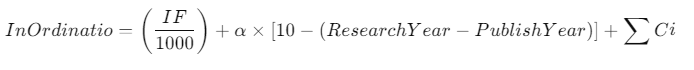

**Onde:**

- **IF:** Fator de impacto (CiteScore).
- **ResearchYear:** Ano em que a pesquisa bibliométrica é realizada (2024).
- **PublishYear:** Ano de publicação do artigo.
- **ΣCi**: Total de citações do artigo.

**Automatização com Data Science:** Foi escrito um código que realiza a junção automática das bases e aplica a fórmula de InOrdinatio para cada artigo. Isso evita a necessidade de fazer correspondências manuais entre os títulos e reduz o tempo de trabalho.

# Fase 7 – Priorização e Geração da Lista Final

- **Ordenação por InOrdinatio:** Os artigos foram ordenados em ordem decrescente com base no valor do InOrdinatio. Isso facilita a priorização dos artigos mais relevantes para leitura nas fases seguintes.
- **Exportação da Planilha Final:** Geramos um arquivo com todas as informações relevantes (título, abstract, ano, CiteScore, e InOrdinatio) para guiar a leitura e a escolha dos artigos nas próximas fases.

# Desafios Identificados

- **Falta de Padronização:** Os títulos nos dois arquivos apresentavam inconsistências, como variações em espaçamentos e grafia, o que dificultou a correspondência exata.
- **Limitação da Scopus:** A plataforma só permite a exportação de 1.000 registros por vez, limitando o uso completo da base.
- **Uso da API:** Embora a API permita acesso a dados maiores, sua utilização exige conhecimento técnico e autorização, o que pode ser uma barreira para pesquisadores sem essa experiência.

# Vantagens da Automação com Data Science
**Rapidez:** A junção das bases e o cálculo do InOrdinatio foram feitos em segundos, evitando a necessidade de processos manuais demorados.
**Eficiência:** O processo automatizado deixa mais tempo para as fases 8 e 9, que envolvem a busca e a leitura integral dos artigos.
**Facilidade na Escolha dos Artigos:** Com o InOrdinatio, os pesquisadores podem priorizar os artigos mais relevantes para leitura.

# Conclusão
A aplicação de Data Science nas fases 5, 6 e 7 do método InOrdinatio trouxe agilidade e precisão para a seleção dos artigos, apesar das limitações encontradas na padronização dos dados e nas restrições da Scopus. A automatização dessas etapas é fundamental para garantir que o pesquisador possa focar na análise dos artigos mais relevantes nas próximas fases, otimizando o processo de revisão bibliométrica.


#Conclusão para o Artigo
A aplicação de Data Science nas etapas 5, 6 e 7 do método InOrdinatio trouxe vantagens significativas, principalmente ao agilizar e aumentar a precisão do processo. A integração automatizada entre diferentes bases de dados e o cálculo eficiente do índice InOrdinatio proporcionaram economia de tempo, permitindo que os pesquisadores se concentrassem nas fases posteriores de busca e leitura dos artigos mais relevantes. Além disso, a estrutura robusta da Scopus, com sua ampla cobertura de publicações científicas e metadados organizados, foi essencial para o sucesso dessa aplicação, garantindo acesso rápido e sistemático a fontes confiáveis e atualizadas.

No entanto, algumas oportunidades de aprimoramento foram identificadas durante a aplicação do método. Em certos casos, a falta de padronização nos títulos entre as bases dificultou a correspondência automatizada, exigindo maior atenção no tratamento dos dados. Reconhecemos que a Scopus já oferece uma base bem estruturada, mas a adoção de um sistema de normalização automática para títulos e nomes de publicações poderia potencializar ainda mais a eficiência do processo. Esse sistema, baseado em algoritmos de aprendizado de máquina, ajudaria a identificar e corrigir pequenas variações que comprometem a integração de dados.

Adicionalmente, sugerimos uma reflexão sobre a limitação de exportação de 1.000 registros por consulta, que pode restringir análises mais profundas. A ampliação desse limite ou a oferta de pacotes organizados por tema ou período traria mais flexibilidade para os pesquisadores. Por fim, tornar o uso da API mais acessível, com documentação clara e suporte técnico contínuo, estimularia uma adoção mais ampla de ferramentas automatizadas, promovendo uma experiência mais colaborativa. As iniciativas da Scopus já são altamente reconhecidas e sua abertura para pequenas melhorias pode garantir um suporte ainda maior à comunidade científica e fortalecer seu papel essencial na disseminação do conhecimento.